In [1]:
%matplotlib inline

from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")

# Data Description


### this data represent simulated heights and weights of 100 saudi males. We will use PCA on this data to understand how it works and how we can use it.

In [2]:
hw_data = pd.read_csv("../data/male_saudi_hw.csv")
hw_data

,height_cm,weight_kg,height_feet,weight_pounds
0,164.44,75.68,5.39,166.49
1,164.44,47.56,5.39,104.62
2,169.87,71.46,5.57,157.21
3,172.50,99.46,5.66,218.81
4,174.79,59.47,5.73,130.84
...,...,...,...,...
95,163.46,96.06,5.36,211.34
96,164.95,59.38,5.41,130.65
97,179.56,63.84,5.89,140.44
98,165.78,55.86,5.44,122.89


#### As we can see some of the variables are redundant, and one of the applications of PCA is to remove redundancy.

# Exercise 1:

### Extract the principal components of the data

In [3]:
hw_pca = PCA()
(
    hw_pca
    .fit(hw_data)
    .components_
    .round(3)
)

array([[ 0.068,  0.413,  0.002,  0.908],
       [ 0.997, -0.028,  0.033, -0.062],
       [ 0.026,  0.567, -0.782, -0.258],
       [ 0.02 , -0.712, -0.622,  0.324]])

# Exercise 2:

### Remove the effect of the unit used, then extract the principal components

# Exercise 3:

### How many informative principal components are there?

# PCA in Finance


### the dataset in this section is represented as multivariate time-series. Each column represent the closing price for a company in the year 2019.

In [5]:
stocks = pd.read_csv("../data/stocks.csv", index_col=0)
stocks

,EADB,CAIA,BAIA,CDAA,EAIA,CBCA,EAAH,EBIA,HADA,BIDC,...,EAAB,BCBA,CBBA,EAAE,IBFA,BDCA,GAHA,HABA,CBFA,EDEG
date,,,,,,,,,,,,,,,,,,,,,
2019-01-01,8.21,7.49,5.68,5.18,2.50,3.39,6.69,2.89,2.22,6.25,...,18.67,5.85,4.98,9.78,6.99,4.78,5.67,24.40,4.80,2.17
2019-01-02,8.19,7.51,5.67,5.20,2.46,3.38,6.66,2.89,2.23,6.25,...,18.59,5.85,5.01,9.82,7.06,4.75,5.65,24.80,4.78,2.17
2019-01-03,8.20,7.51,5.68,5.17,2.47,3.52,6.67,2.85,2.24,6.25,...,18.61,5.87,4.99,9.75,6.98,4.75,5.66,25.33,4.80,2.17
2019-01-06,8.24,7.51,5.74,5.06,2.45,3.70,6.67,2.87,2.23,6.25,...,18.56,6.00,4.99,9.78,7.00,4.75,5.69,25.33,4.79,2.17
2019-01-07,8.17,7.53,5.87,5.09,2.49,3.59,6.81,2.89,2.23,5.91,...,19.07,6.05,4.90,10.17,7.04,4.82,5.72,25.60,4.81,2.17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-25,8.91,8.04,7.59,3.70,2.37,3.61,5.46,3.03,3.18,20.06,...,21.63,6.12,4.43,10.01,7.11,5.36,6.13,27.25,4.63,2.02
2019-12-26,8.99,8.12,7.47,3.48,2.42,3.66,5.57,3.04,3.19,19.52,...,21.73,6.56,4.50,10.37,7.15,5.39,6.13,27.04,4.63,2.04
2019-12-29,9.24,8.17,7.37,3.51,2.44,3.72,5.62,3.12,3.19,20.35,...,21.87,6.43,4.70,10.47,7.16,5.40,6.03,27.20,4.72,2.08


# Exercise 4

### plot the top 5 companies with the highest entropy.

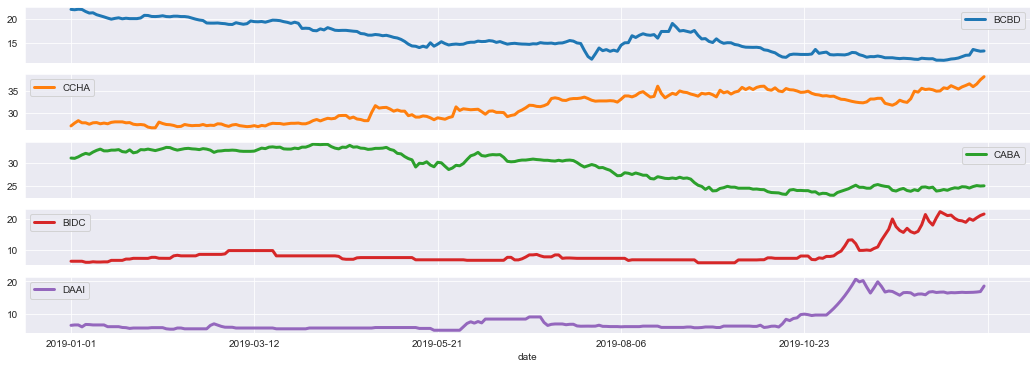

In [6]:
high_entropy_stocks = (
    stocks
    .std()
    .sort_values()
    .tail(5)
    .index
)
stocks[high_entropy_stocks].plot(figsize=(18, 6), lw=3, subplots=True);

# Exercise 5

### plot the top 5 companies with the lowest entropy.

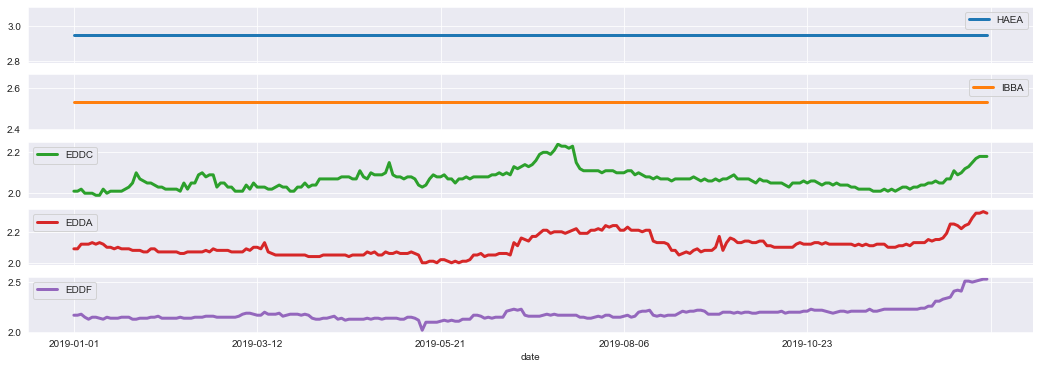

In [7]:
high_entropy_stocks = (
    stocks
    .std()
    .sort_values()
    .head(5)
    .index
)
stocks[high_entropy_stocks].plot(figsize=(18, 6), lw=3, subplots=True);

# Case Study

#### Investment firms always say 'do not put all your eggs in one basket'. This saying comes from the fact that stock prices for certain companies move together, so investing in highly correlated companies is dangerous.

#### One trick they do is to analyze stocks and find the ones that do not move together, so that in case one stock carshes, other investments would not be affected. We will say how they use PCA to overcome this challenge

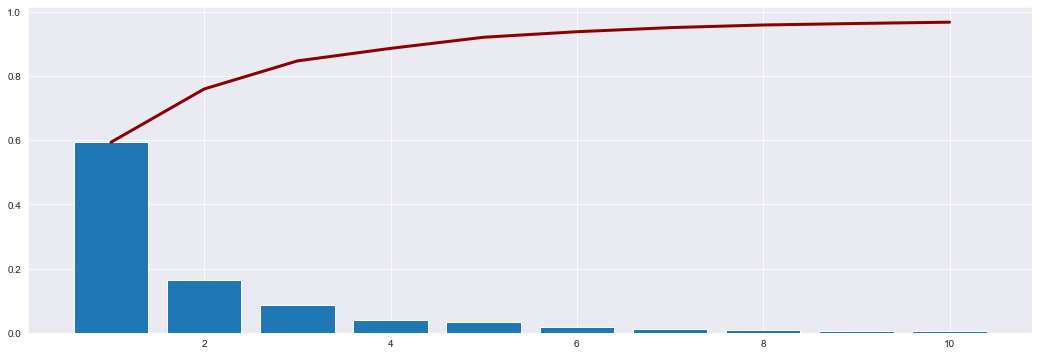

In [8]:
pca = PCA(10).fit(stocks)

plt.figure(figsize=(18, 6))
x_axis = np.arange(1, pca.n_components+1)
plt.bar(x_axis, height=pca.explained_variance_ratio_)
plt.plot(x_axis, pca.explained_variance_ratio_.cumsum(), lw=3, color="darkred");

In [9]:
four_components = PCA(4, svd_solver="full").fit(stocks)
four_components.components_.shape

(4, 196)

In [10]:
(
    pd.DataFrame({
        "ccode": stocks.columns,
        "PC1": four_components.components_[0],
    })
    .sort_values("PC1")
)

,ccode,PC1
127,CABA,-0.307981
156,BCBD,-0.242687
157,EBEA,-0.175664
72,CCJA,-0.170821
50,EAAI,-0.156502
...,...,...
47,DAEA,0.203785
9,BIDC,0.207284
94,ECAA,0.209301
161,CCHA,0.244985


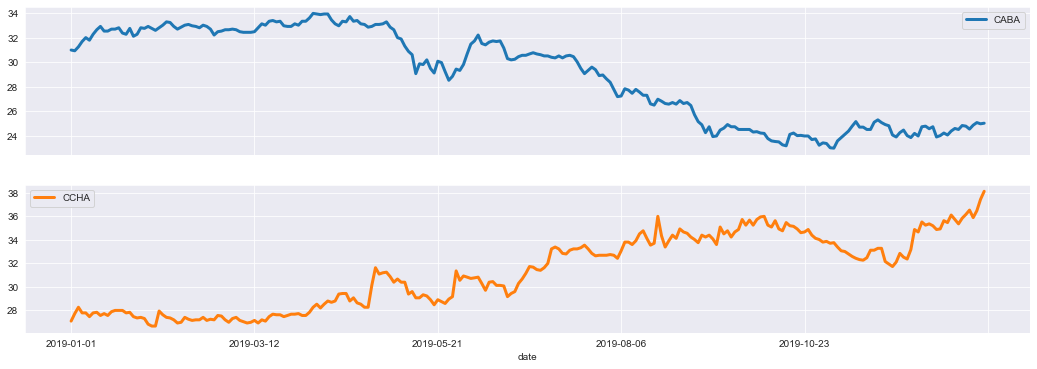

In [11]:
stocks[["CABA", "CCHA"]].plot(figsize=(18,6), subplots=True, lw=3);

In [12]:
(
    pd.DataFrame({
        "ccode": stocks.columns,
        "PC2": four_components.components_[1],
    })
    .sort_values("PC2")
)

,ccode,PC2
38,ECBA,-0.255155
171,BIDA,-0.217153
91,EBJA,-0.210161
161,CCHA,-0.159306
131,DADA,-0.147632
...,...,...
113,EAFB,0.177141
105,ICDA,0.190062
126,EBEB,0.232248
60,DAAI,0.345000


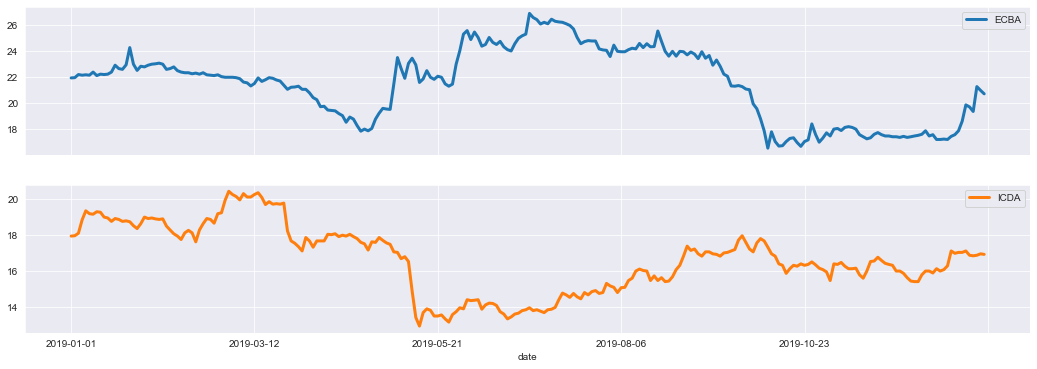

In [13]:
stocks[["ECBA", "ICDA"]].plot(figsize=(18,6), subplots=True, lw=3);